In [2]:
import os
import pandas as pd

In [3]:
def get_stats_as_history(path):
    f = open(path, "r")
    lines = f.readlines()
    f.close()
    lines = lines[1::2]
    max_fitness = []
    max_avg_score = []
    avg_fitness = []
    avg_deaths = []
    avg_score = []
    max_score = []
    for line in lines:
        stats = line.split(" ")
        max_fitness.append(int(stats[0]))
        max_avg_score.append(float(stats[1]))
        avg_fitness.append(float(stats[2]))
        avg_deaths.append(float(stats[3]))
        avg_score.append(float(stats[4]))
        max_score.append(int(stats[5]))
    return max_fitness, max_avg_score, avg_fitness, avg_deaths, avg_score, max_score

In [4]:
def read_data(path):
    directory = os.path.join(os.getcwd(),path)
    # iterate over files
    # that directory
    temp={}

    for subdir, dirs, files in os.walk(directory):
        for file in files:
            algorithm=subdir.split("\\")[-1]
            directory=os.path.join(subdir, file)
            if "stats" in directory:
                temp[algorithm]=get_stats_as_history(directory)

    dataframe=pd.DataFrame(temp).T
    dataframe.columns=["max_fitness", "max_avg_score", "avg_fitness", "avg_deaths", "avg_score", "max_score"]
    return dataframe

In [5]:
dataframe_initial=read_data("weights/Weights_initial_testing/genetic_algorithm")

In [6]:
dataframe_initial.drop(["standard_population","geom_seman"],inplace=True)

In [7]:
dataframe_initial.apply(lambda x: max(x["max_score"]),axis=1).sort_values(ascending=False)

creep_standard_tournament         58
creep_geometric_tournament        20
standard_geometric_tournament     16
creep_uniform_tournament          11
standard_uniform_tournament       10
geometric_geometric_ranking        8
standard_uniform_ranking           7
geometric_geometric_tournament     7
geometric_standard_fps             6
standard_standard_tournament       6
geometric_standard_tournament      6
creep_geometric_ranking            5
geometric_geometric_fps            5
standard_geometric_ranking         5
standard_standard_ranking          5
geometric_uniform_tournament       5
standard_standard_fps              4
standard_uniform_fps               4
creep_geometric_fps                4
standard_geometric_fps             4
geometric_uniform_ranking          4
creep_uniform_ranking              4
creep_uniform_fps                  4
creep_standard_ranking             4
creep_standard_fps                 4
geometric_standard_ranking         4
geometric_uniform_fps              3
d

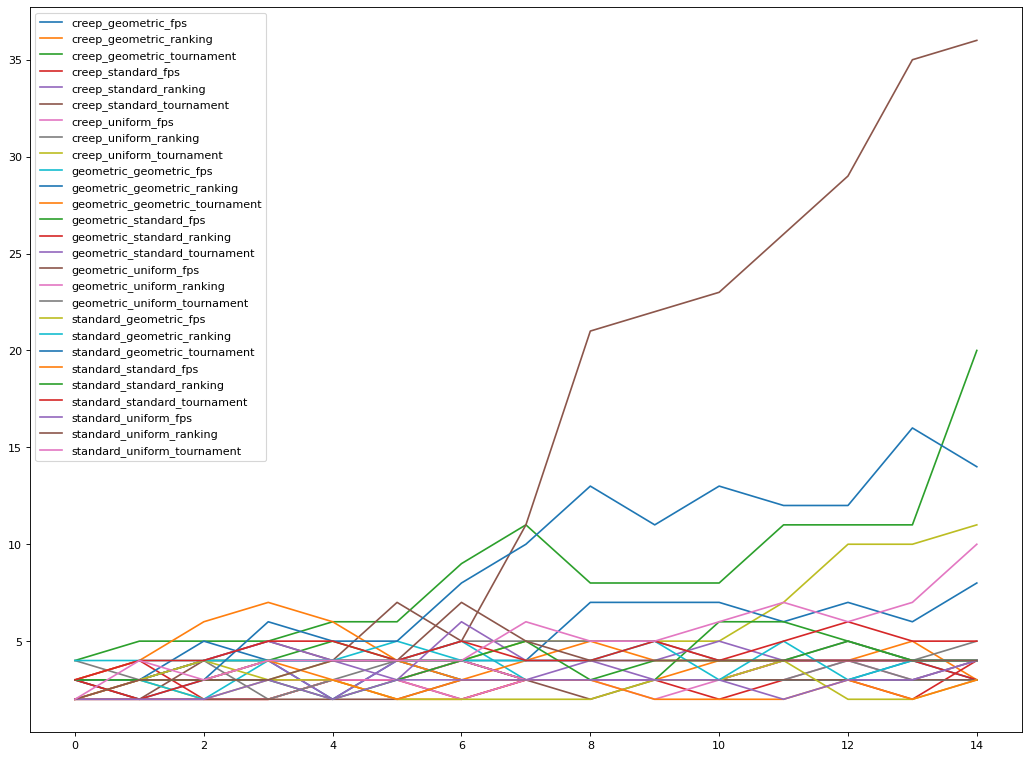

In [8]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(16, 12), dpi=80)
dataframe_initial.apply(lambda x: plt.plot(range(15),x["max_score"][:15],label=x.name),axis=1)
# dataframe.apply(lambda x: plt.plot(range(15),x["max_score"][:15],label=x.name),axis=1)
plt.legend()
plt.show()

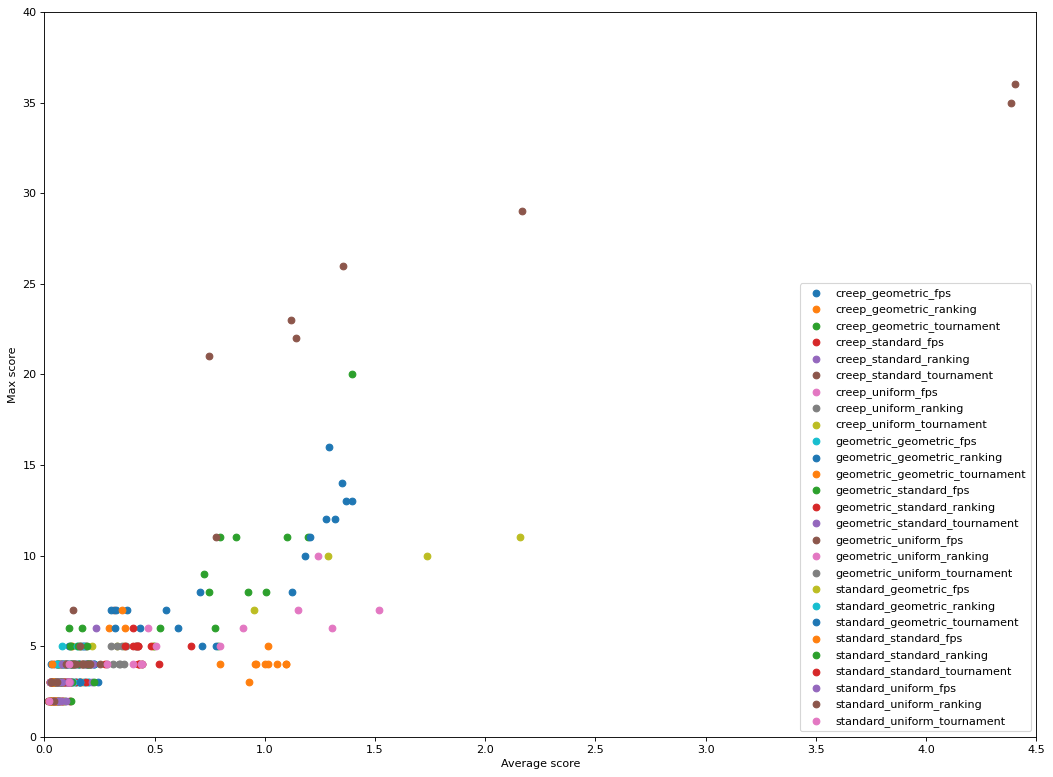

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(16, 12), dpi=80)
dataframe_initial.apply(lambda x: plt.scatter(x["avg_score"][:15],x["max_score"][:15],label=x.name),axis=1)
plt.xlim([0,4.5])
plt.ylim([0,40])
plt.xlabel("Average score")
plt.ylabel("Max score")
# dataframe.apply(lambda x: plt.plot(range(15),x["max_score"][:15],label=x.name),axis=1)
plt.legend()
plt.show()

In [10]:
#dataframe_n_elitism=read_data("no_elitism/genetic_algorithm")
selected_models=['creep_standard_tournament',
'creep_uniform_tournament',
'standard_geometric_tournament',
'standard_uniform_tournament',
'creep_geometric_tournament',
'geometric_geometric_tournament']
dataframe_selected=dataframe_initial[dataframe_initial.index.isin(selected_models)]
# dataframe_cmplx_state=read_data("Complex_state/genetic_algorithm")
# dataframe_new_fitnessf=read_data("new_fitnessf/genetic_algorithm")

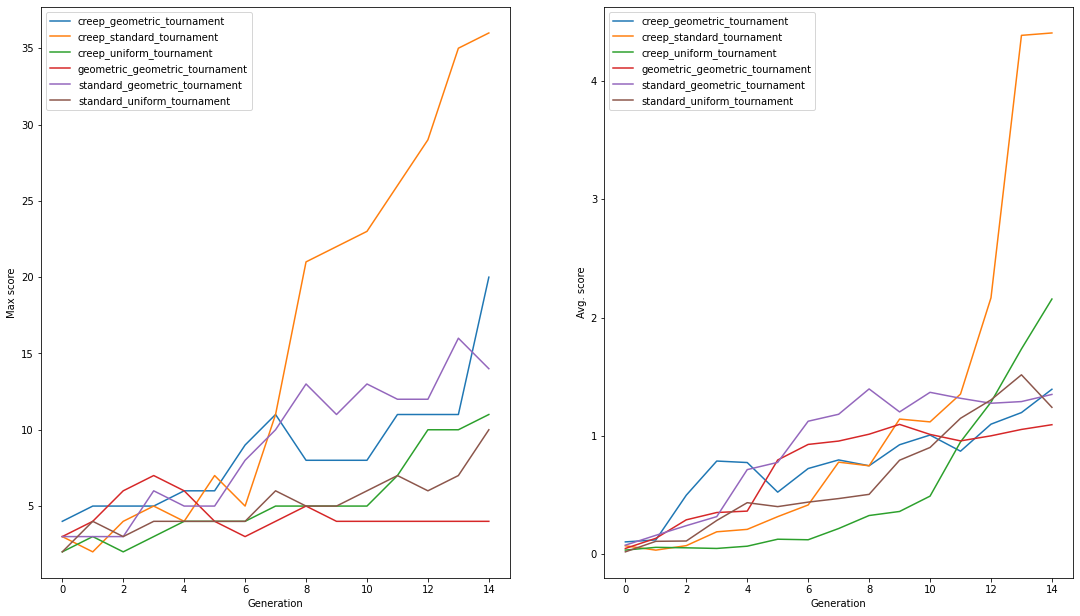

<Figure size 1280x960 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
fig,(ax1, ax2)=plt.subplots(1, 2)
figure(figsize=(16, 12), dpi=80)
# dataframe_new_fitnessf.apply(lambda x: plt.plot(range(len(x["avg_score"])),x["avg_score"],label=x.name),axis=1)
dataframe_selected.apply(lambda x: ax1.plot(range(15),x["max_score"][:15],label=x.name),axis=1)
dataframe_selected.apply(lambda x: ax2.plot(range(15),x["avg_score"][:15],label=x.name),axis=1)

ax1.set_xlabel("Generation")
ax2.set_xlabel("Generation")
ax1.set_ylabel("Max score")
ax2.set_ylabel("Avg. score")
ax2.legend()
ax1.legend()
fig.set_size_inches(18.5, 10.5)

In [23]:
feature="avg_fitness"
max_feature_sel=dataframe_selected.apply(lambda x: max(x[feature]),axis=1)
max_feature_elit=dataframe_n_elitism.apply(lambda x: max(x[feature]),axis=1)
display(max_feature_sel)
print("No elitism")
display(max_feature_elit)
percentage_change=[]
for i,j in zip(max_feature_sel.tolist(),max_feature_elit.tolist()):
    percentage_change.append((1-j/i)*100)
    print((1-j/i)*100)

NameError: name 'dataframe_n_elitism' is not defined

C:\Users\StuartGO\AppData\Local\Temp/ipykernel_4152/1971201294.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


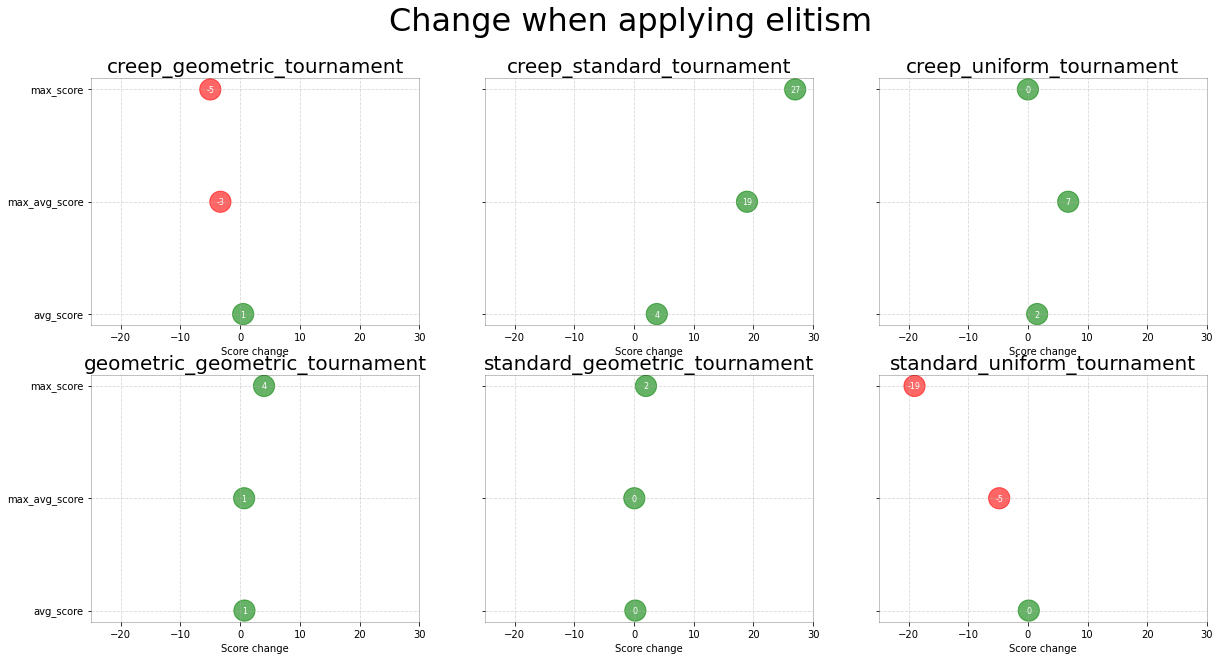

In [ ]:
# Prepare Data
import matplotlib.colors as mcolors
import numpy as np
models=list(max_feature_elit.index)
f, axis = plt.subplots(2, 3,figsize=(20,10),sharey=True)
f.suptitle("Change when applying elitism",size=32)
cmap, norm = mcolors.from_levels_and_colors([-5000,0,300], ['red', 'green'])
for i in range(0,len(models)):
    current_model=models[i]
    ax=axis.flatten()[i]
    plt.sca(ax)
    elitism=dataframe_selected.loc[current_model].to_dict()
    no_elitism=dataframe_n_elitism.loc[current_model].to_dict()
    percentage_change=[]
    features=elitism.keys()
    features=list(set(features)-set(["avg_deaths","avg_fitness","max_fitness"]))
    for feature in features:
        no_elit_val=max(no_elitism[feature][:15])
        elit_val=max(elitism[feature][:15])
        percentage_change.append(elit_val-no_elit_val)
    plt.scatter(percentage_change, range(len(features)), s=450, alpha=.6,cmap=cmap,c=percentage_change,norm=norm)
    for x, y, tex in zip(percentage_change, range(len(features)), percentage_change):
        t = plt.text(x, y, round(tex), horizontalalignment='center', 
                    verticalalignment='center', fontdict={'color':'white',"size":8})
    
    # Decorations
    # Lighten borders
    plt.gca().spines["top"].set_alpha(.3)
    plt.gca().spines["bottom"].set_alpha(.3)
    plt.gca().spines["right"].set_alpha(.3)
    plt.gca().spines["left"].set_alpha(.3)

    plt.yticks(range(len(features)), features)
    plt.title(current_model, fontdict={'size':20})
    plt.xlabel('Score change')
    plt.grid(linestyle='--', alpha=0.5)
    plt.xlim(-25, 30)

f.show()

In [ ]:
# fitness=[ 151050  144000  181650  143300   97100  130050 -269600  111700  147400
#   248750   82900  183000  -12650 -530450 -190000 -115950  -78350 -189900
#  -524300 -144950 -190600 -166050  -55150  -98550 -269150 -524000 -276800
#   -46400  -80900  -61450 -319250 -121500 -524000  -19150 -186700  -30900
#   -21750 -524450  -97750  -30650 -104750  -44500  -58350 -537300  -65150
#  -530100 -308850 -524450  -80850 -281350]
# deaths=[  5  14   7  10   4   9   4  38  14  15  12  20  15  63  36  33 489  42
#    2 153   0 467 231  15   1   0  72 146 210  59 495 510   0  13  14 184
#   17   3   3 167  23  14  81 122 257  54 419   3   3 149]
# avg_score=[1.317e+01 8.400e+00 1.425e+01 8.550e+00 1.340e+01 8.700e+00 2.000e-01
#  1.640e+00 5.000e+00 6.190e+00 7.080e+00 5.900e+00 7.500e-01 0.000e+00
#  5.000e-02 1.200e-01 5.000e-02 5.000e-02 0.000e+00 2.000e-02 2.000e+00
#  1.000e-02 1.100e-01 3.100e-01 5.000e-01 0.000e+00 1.000e-02 1.800e-01
#  5.000e-02 1.800e-01 0.000e+00 2.000e-02 0.000e+00 2.000e+00 1.300e-01
#  3.200e-01 1.390e+00 0.000e+00 1.250e+00 1.800e-01 2.100e-01 1.070e+00
#  1.800e-01 0.000e+00 4.000e-02 0.000e+00 0.000e+00 0.000e+00 1.500e+00
#  1.000e-02]
max_scores="""[34 31 39 32 24 30  1 28 34 53 20 39 10  0  1  2  3  1  0  1  0  1  2  2 1  0  1  2  1  2  1  1  0  4  1  2  4  0  2  3  1  2  1  0  3  0  1  0 3  1]"""
max_scores=max_scores.strip("[]").split(" ")
max_scores=list(filter(lambda x: x!="", max_scores))
max_scores=list(map(lambda x: int(x), max_scores))
max_scores.sort()

Text(0, 0.5, 'Count')

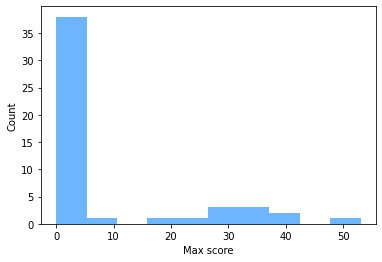

In [ ]:
import matplotlib.pyplot as plt
plt.hist(max_scores,color="#6eb5ff")
plt.xlabel("Max score")
plt.ylabel("Count")